# Predictive Maintenance Machine Learning Project

This notebook builds a realistic ML model that predicts **component failure** in industrial machines using sensor data.
Ideal for a **professional portfolio**.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv('predictive_maintenance_dataset.csv')
df.head()

,temperature,vibration,pressure,runtime_hours,humidity,component_failure
0,74.967142,1.092192,24.429593,2884.730018,39.216692,0
1,68.617357,2.139615,26.845346,2329.401759,34.845307,0
2,76.476885,2.586394,25.289699,779.620075,35.198377,0
3,85.230299,4.887688,27.260021,1577.062578,40.301407,0
4,67.658466,3.556553,28.929248,318.633555,41.119819,0


## Train/Test Split

In [3]:
X = df.drop(columns=['component_failure'])
y = df['component_failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training (Random Forest)

In [4]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

pred = rf.predict(X_test_scaled)
probs = rf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, pred))
print('ROC AUC:', roc_auc_score(y_test, probs))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       431
           1       0.93      0.90      0.92       169

    accuracy                           0.95       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600

ROC AUC: 0.9927785938851439


## ROC Curve

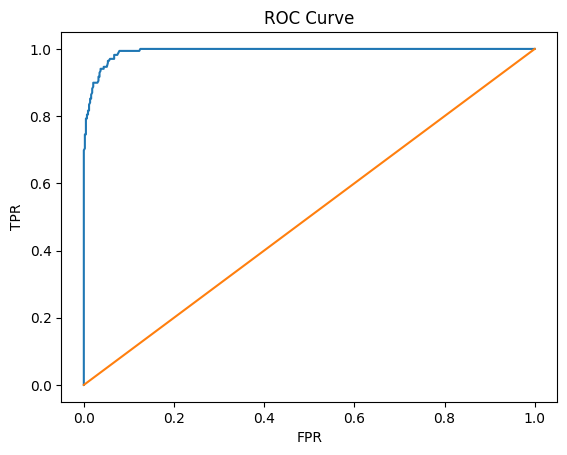

In [5]:
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [6]:
import numpy as np
import pandas as pd

# Example new incoming sensor reading
new_reading = {
    "temperature": 92,
    "vibration": 4.5,
    "pressure": 36,
    "runtime_hours": 4200,
    "humidity": 60
}

# Convert to dataframe
new_df = pd.DataFrame([new_reading])

# Apply the same scaler used during training
new_scaled = scaler.transform(new_df)

# Predict class and probability
pred_class = rf.predict(new_scaled)[0]
pred_prob = rf.predict_proba(new_scaled)[0][1]

print("Prediction:", "FAILURE" if pred_class == 1 else "NORMAL")
print("Failure Probability:", round(pred_prob, 3))


Prediction: FAILURE
Failure Probability: 0.99
